# AES Differential Side-channel Analysis

#### Coding your own selection function and distinguishers 

<img src='images/DoIt.png' style='width: 100px'>

# DO IT YOURSELF

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
    
plt.rcParams["figure.figsize"] = [20, 5]

---
<img src='images/DoIt.png' style='width: 100px'>

## Import the traces needed for the analysis

<img src='images/DoIt.png' style='width: 100px'>

#### Load the trace 'AES_traces_set_1st_round.ets'
from SideSCA-Traces-Public: git clone https://github.com/BeneoLix/SideSCA-Traces-Public.git

In [2]:
import estraces

In [3]:
ths = estraces.read_ths_from_ets_file("../SideSCA-Traces-Public/AES_traces_set_1st_round.ets") 

---
<img src='images/DoIt.png' style='width: 100px'>

#### Print the ths information, the ths len


In [4]:
print(ths)

Trace Header Set:
Name.............: ETS Format THS
Reader...........: ETS format reader of file ../SideSCA-Traces-Public/AES_traces_set_1st_round.ets with 2000 traces.
ciphertext.......: uint8
key..............: uint8
plaintext........: uint8



In [5]:
# collect traces, plaintext, key and ciphertext

In [6]:
plaintext_np_array = ths.plaintext
print(type(plaintext_np_array))
print(plaintext_np_array)
plaintext_np_array.shape

<class 'numpy.ndarray'>
[[ 22 171 243 ... 133 132 203]
 [ 79 193  72 ... 198 239  40]
 [ 86 136  48 ...  28  99 187]
 ...
 [156 170 193 ... 115 219 222]
 [127  52 124 ... 128 225 178]
 [132  30  98 ... 241 126  64]]


(2000, 16)

In [7]:
# collect traces, plaintext, key and ciphertext
plaintext_np_array

array([[ 22, 171, 243, ..., 133, 132, 203],
       [ 79, 193,  72, ..., 198, 239,  40],
       [ 86, 136,  48, ...,  28,  99, 187],
       ...,
       [156, 170, 193, ..., 115, 219, 222],
       [127,  52, 124, ..., 128, 225, 178],
       [132,  30,  98, ..., 241, 126,  64]], dtype=uint8)

In [8]:
plaintext_np_array = ths.plaintext
print(type(plaintext_np_array))
print(plaintext_np_array)
plaintext_np_array.shape

<class 'numpy.ndarray'>
[[ 22 171 243 ... 133 132 203]
 [ 79 193  72 ... 198 239  40]
 [ 86 136  48 ...  28  99 187]
 ...
 [156 170 193 ... 115 219 222]
 [127  52 124 ... 128 225 178]
 [132  30  98 ... 241 126  64]]


(2000, 16)

In [9]:
ciphertext_np_array = ths.ciphertext
print(type(ciphertext_np_array))
print(ciphertext_np_array)
ciphertext_np_array.shape

<class 'numpy.ndarray'>
[[ 61  49 209 ... 238 160 148]
 [ 46 249  63 ... 133 129  78]
 [  0  44 100 ... 205 105 195]
 ...
 [  6  30  70 ...  57  68   5]
 [ 81 121 221 ... 207  24 226]
 [255  65 172 ... 201 186  17]]


(2000, 16)

In [10]:
key_np_array = ths.key
print(type(key_np_array))
print(key_np_array)
key_np_array.shape

<class 'numpy.ndarray'>
[[143   3 231 ...  99  78  15]
 [143   3 231 ...  99  78  15]
 [143   3 231 ...  99  78  15]
 ...
 [143   3 231 ...  99  78  15]
 [143   3 231 ...  99  78  15]
 [143   3 231 ...  99  78  15]]


(2000, 16)

In [11]:
traces_np_array = ths.samples
print(type(traces_np_array))
print(traces_np_array)
traces_np_array.shape

<class 'estraces.traces.samples.Samples'>
array([[-20,   8,  30, ...,  14, -40, -29],
       [-20,   8,  30, ...,  11, -40, -29],
       [-20,   8,  30, ...,  14, -40, -29],
       ...,
       [-20,   8,  30, ...,  14, -40, -29],
       [-20,   8,  30, ...,  15, -40, -29],
       [-20,   8,  30, ...,  15, -40, -29]], dtype=int8)


(2000, 3000)

---
<img src='images/DoIt.png' style='width: 100px'>

## Plot and Observe  the traces


In [12]:
...

Ellipsis

----------
<img src='images/DoIt.png' style='width: 100px'>

## Do by your own a side-channel Differential Analysis (DPA)

<img src="./images/openTheDoor.jpeg" width="200px">

### Targeting the intermediate computations in the AES

This attack technique needs to perform guesses on a part of the key (divide-and-conquer approach) and for each guess, knowing the plaintext (resp. the ciphertext) we can compute the intermediate data that is manipulated by the targeted device during the computation. 

Of course only the right guess will lead the values really manipulated by the device.

In that case the DPA attack will succeed and gives the information the guess leading to highest DPA peak matches with the secret key.

<img src="./images/AESscheme.png" width="300px">

-------------
<img src='images/DoIt.png' style='width: 100px'>

### So develop your own DPA selection function 

### Perform the Attack on the first round

Knowing the plaintexts (AES inputs) we know the value given as input to the first AES (SPN) round.

Performing guesses on each key byte we can guess all the intermediate values of the first round and and use these values with DPA to exploit the related side-channel trace collected by performing the attack.

It can be the output of the key addition, the output of the Subbytes operations.

## You can reuse the reverse from TP1 and TP2 to locate the part of the trace:
* with CPA as in TP2 and TP2
* with DPA that is of this TP interest replacing CPA by DPA and selecting monobit model and a bit (in 0 to 7)

In [13]:
import scared

In [14]:
def aes_function_firstRde_SBout(plaintext, key):
    return scared.aes.encrypt(plaintext = plaintext, key = key, at_round=1, after_step=scared.aes.base.Steps.SUB_BYTES)

In [15]:
container = scared.Container(ths)

In [16]:
Selection_function = scared.reverse_selection_function(aes_function_firstRde_SBout)

In [17]:
Reverse_SB = scared.DPAReverse(selection_function = Selection_function, model = scared.Monobit(0))
Reverse_SB.run(container)

In [18]:
Reverse_SB.results.shape

(16, 3000)

### Plot results

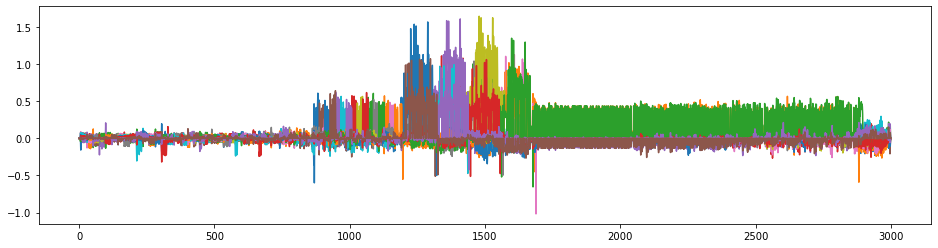

In [19]:
plt.rcParams['figure.figsize']=(16,4)
plt.plot(Reverse_SB.results.T)
plt.show()

-------------
<img src='images/DoIt.png' style='width: 100px'>

### Develop your own DPA selection function 

---
Code your own selection function: output of SubBytes at first round

In [8]:
import numpy as _np

SBOX = _np.array([
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
    0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
    0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
    0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
    0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
    0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
    0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
    0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
    0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16],
    dtype=_np.uint8)

In [9]:
def my_select_funct_Sbox_out(data, guesses):
    ...
    ...
    
    return ...

--------
### Test it

In [10]:
S_matrix = my_select_funct_Sbox_out(ths.plaintext, range(256))

In [11]:
print(S_matrix.shape)

(2000, 256, 16)


<img src='images/DoIt.png' style='width: 100px'>

### Use this selection function with scared distinguisher

In [12]:
import scared

---
Define it as the selection function to use in attack object

In [13]:
@scared.attack_selection_function
def sel(plaintext, guesses):
    return my_select_funct_Sbox_out(plaintext, guesses)

---
<img src='images/DoIt.png' style='width: 100px'>

Set the leakage model, the distinguisher and discrimant

In [14]:
M = scared.Monobit(0)

d = scared.maxabs

---
🅰️ Set the attack

In [15]:
container = scared.Container(ths)

In [16]:
attack_dpa = scared.DPAAttack(
                selection_function=sel, 
                model=M, 
                discriminant=d)

---
<img src='images/DoIt.png' style='width: 100px'>

Run it

In [17]:
attack_dpa.run(container)

Now what is the key recovered? 
<br>Compare with the correct one.

In [17]:
found_key = ...

In [ ]:
vhex = np.vectorize(hex)
print("the key found is:   ", vhex(found_key))
print("the correct key is: ", vhex(ths[0].key))

---
<img src='images/DoIt.png' style='width: 100px'>

### Print and plot the result

In [18]:
attack_dpa.results.shape

(256, 16, 3000)

### Plot the result


In [21]:
ths[0].key[key_byte_nb]

143

In [ ]:
plt.rcParams["figure.figsize"] = [20, 3]
for key_byte_nb in range(16):
    ...
    ...
    plt.title('DPA result for byte '+str(key_byte_nb))
    plt.show()

-------------
<img src='images/DoIt.png' style='width: 100px'>

### Doing your own distinguisher for DPA (and later CPA)

---
🅰️ Do your own Difference of Mean on traces for a given guess and selection function

---
🅰️ Apply the DoM on the correct key byte value in position 0

---
🅰️ Apply the DoM on an incorrect key byte value in position 0

---
🅰️ Do your own DPA for several guesses

In [25]:
from tqdm import tnrange

In [ ]:
def compute_DPA(ths, selection_function_matrix, key_byte, guesses_range):

    
    
    
    
    
    

---
🅰️ Test it

---
🅰️ Plot the resulting traces